Please press Shift + Enter to run each cell

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc, rcParams

# Fig. S5

Fig. S5b: CO FE effects

In [2]:
#VARIABLES AND CONSTANTS

Qcr=231 + 23 #Energy cost for carbonate regeneration, kJ/molCO2
Qpsa=(14.5 + 36.4)/2 # Pressure swing absorption kJ/molCO2, the energy is in between 14.5-36.4 kJ/molCO2.
Qcompression = (14+19)/2 #CO2 compression kJ/molCO2, the energy is in between 14.0 - 19.0 kJ/molCO2 
Qar=179 # Amine regeneration considering heat integration in the capture, kJ/molCO2, the energy is at between 155 - 203 kJ/molCO2
z=2
F=96485

Xout=0.3 #CO2 loading for CO2-lean amine stream
Xin=0.5 #CO2 loading for CO2-rich amine stream

x=0.5 #Single-pass conversion rate of the gas-fed electrolyzer
FE=0.9  #CO FE for the gas-fed electrolyzer
E=3 # Cell voltage of the gas-fed electrolyzer, V

X=0.3 #CO2 loading in the effluent of the integrated electrolyzer
Ecomb=4 #Cell voltage of the integrated electrolyzer, V
Ecomb_optimal=3 #Set a lower cell potential
Ecomb_worst=5 #Set a higher cell potential

FEcomb=np.arange(.2,0.91,0.01) #CO FE of the integrated electrolyzer from 0.2 to 0.9

#CALCULATE ENERGY COST
#Sequential route
Qsep=Qar+ Qcompression + Qpsa*2*(1/x-1)+Qcr+E*z*F/FE/1000

#Integrated route
r=np.divide((X-Xout),(Xin-Xout)) #Molar ratio of the unreacted CO2 for the separation&electrolysis process
rc = np.divide((Xin-X),(Xin-Xout)) #Molar ratio of the CO2 used for the integrated electrolysis

Qec = rc*(np.dot(Ecomb, z*F)/(FEcomb*1000)) #Energy cost of the integrated electrolyzer, kJ/molCO2
Qec_optimal = rc*(np.dot(Ecomb_optimal, z*F)/(FEcomb*1000)) #Energy cost of the integrated electrolyzer based on an optimal cell voltage, kJ/molCO2
Qec_worst = rc*(np.dot(Ecomb_worst, z*F)/(FEcomb*1000)) 

Qarcomb=Qsep*r #Energy cost of the separation&electrolysis process, kJ/molCO2

Qcomb=Qarcomb + Qec #Total energy cost for the integrated route
Qcomb_optimal=Qarcomb + Qec_optimal #Total energy cost for the integrated route based on 3V cell voltage
Qcomb_worst=Qarcomb + Qec_worst #Total energy cost for the integrated route based on 5V cell voltage

#Energy gains
gain = Qsep - Qcomb #for cell voltage = 4V
gain_optimal = Qsep - Qcomb_optimal #for cell voltage = 3V
gain_worst = Qsep - Qcomb_worst #for cell voltage = 5V


([<matplotlib.axis.YTick at 0x20a6dc4d640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

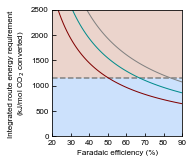

In [3]:
plt.rcParams['font.family']='Arial' #Set font to be Arial
plt.rcParams['font.size']=8 #Set fontsize to be 8

fig=plt.gcf()
fig.set_size_inches((2.33, 2.33)) #Set figure size 

plt.fill_between(FEcomb*100, 0, Qsep, facecolor='#cce1fc') #Plot the region where integrated route has energy benefits
plt.fill_between(FEcomb*100, Qsep, 3000, facecolor='#ebd4cc') #Plot the region where sequential route has energy benefits

plt.plot(FEcomb*100,np.ones(len(FEcomb))*Qsep, '--', color='gray') #Plot the breakeven line

plt.plot(FEcomb*100, Qcomb, color='darkcyan', lw=1) #Plot the baseline
plt.plot(FEcomb*100, Qcomb_optimal, color='maroon', lw=1) #Plot the optimal case
plt.plot(FEcomb*100, Qcomb_worst, color='gray', lw=1) #Plot the pessimistic case

plt.xlabel('Faradaic efficiency (%)') #Add xlabel
plt.ylabel('Integrated route energy requirement \n(kJ/mol CO$_2$ converted)') #Add ylabel
plt.tick_params(direction='in') #All ticks point inward
plt.xlim(20,90) #Set x-axis limits
plt.ylim(0,2500) #Set y-axis limits
plt.xticks(np.arange(20,91, 10)) #Set the xticks
plt.yticks(np.arange(0, 2501, 500)) #Set the yticks
#fig.savefig('Figure/FE impact integrated.png', bbox_inches='tight', pad_inches=0, dpi=1200)

In [4]:
#A program to calculate breakeven point
def breakeven(gain):
    minid=np.argmin(abs(gain))
    return FEcomb[minid]
    #print(gain[minid])

In [5]:
print('When the cell voltage = 4 V, the breakeven CO FE is', round(breakeven(gain),3)*100, '%')
print('When the cell voltage = 3 V, the breakeven CO FE is', round(breakeven(gain_optimal),3)*100, '%')
print('When the cell voltage = 5 V, the breakeven CO FE is', round(breakeven(gain_worst),3)*100, '%')

When the cell voltage = 4 V, the breakeven CO FE is 67.0 %
When the cell voltage = 3 V, the breakeven CO FE is 51.0 %
When the cell voltage = 5 V, the breakeven CO FE is 84.0 %


Fig. S5c: Cell voltages effects

In [6]:
Ecomb=np.arange(3,5.1,0.1) # Cell potentials sweep from 3 to 5
FEcomb=0.7 #CO FE
FEcomb_optimal = 0.9 #optimal CO FE
FEcomb_worst = 0.4 #pessimesitic CO FE

Qec = rc*(np.dot(Ecomb, z*F)/(FEcomb*1000)) #Energy cost of the integrated electrolyzer, kJ/molCO2
Qec_optimal = rc*(np.dot(Ecomb, z*F)/(FEcomb_optimal*1000)) #Energy cost of the integrated electrolyzer, kJ/molCO2
Qec_worst = rc*(np.dot(Ecomb, z*F)/(FEcomb_worst*1000)) #Energy cost of the integrated electrolyzer, kJ/molCO2
Qarcomb=Qsep*r #Energy cost of the integrated electrolyzer based on an optimal cell voltage, kJ/molCO2

Qcomb=Qarcomb + Qec #Total energy cost for the integrated route
Qcomb_optimal=Qarcomb + Qec_optimal #Total energy cost for the integrated route
Qcomb_worst=Qarcomb + Qec_worst #Total energy cost for the integrated routeQcomb=Qarcomb + Qec #Total energy cost for the integrated route

#Energy gains
gain = Qsep - Qcomb
gain_optimal = Qsep - Qcomb_optimal 
gain_worst = Qsep - Qcomb_worst

([<matplotlib.axis.YTick at 0x20a6fdd4130>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

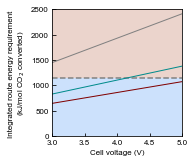

In [7]:
plt.rcParams['font.family']='Arial' #Set font to be Arial
plt.rcParams['font.size']=8 #Set fontsize to be 8

fig=plt.gcf()
fig.set_size_inches((2.33, 2.33)) #Set Figure Size

plt.fill_between(Ecomb, 0, Qsep, facecolor='#cce1fc') 
plt.fill_between(Ecomb, Qsep, 3000, facecolor='#ebd4cc')


plt.plot(Ecomb,np.ones(len(Ecomb))*Qsep, '--', color='gray')


plt.plot(Ecomb, Qcomb, color='darkcyan', lw=1)
plt.plot(Ecomb, Qcomb_optimal, color='maroon', lw=1)
plt.plot(Ecomb, Qcomb_worst, color='gray', lw=1)

plt.xlabel('Cell voltage (V)')
plt.ylabel('Integrated route energy requirement \n(kJ/mol CO$_2$ converted)')
plt.tick_params(direction='in')
plt.xlim(3,5)
plt.ylim(0,2500)
plt.yticks(np.arange(0,2501,500))
#fig.savefig('Figure/E impact integrated.png', bbox_inches='tight', pad_inches=0, dpi=1200)


In [8]:
def breakevenE(gain):
    minid=np.argmin(abs(gain))
    return Ecomb[minid]

In [9]:
print('When the cell voltage = 70%, the breakeven CO FE is', round(breakevenE(gain),3), 'V')
print('When the cell voltage = 90%, the breakeven CO FE is', round(breakevenE(gain_optimal),3), 'V')
print('When the cell voltage = 40%, the breakeven CO FE is', round(breakevenE(gain_worst),3), 'V')

When the cell voltage = 70%, the breakeven CO FE is 4.1 V
When the cell voltage = 90%, the breakeven CO FE is 5.0 V
When the cell voltage = 40%, the breakeven CO FE is 3.0 V


Fig. S5a: Electrolyser power effects

In [10]:
Pcomb=np.arange(1.334*z*F/1/1000, 5*z*F/0.2/1000) #Set a range of the integrated electrolyzer power
Qcomb=Qarcomb + rc*Pcomb #Calculate the total energy requirement for the integrated route
gain=Qsep-Qcomb #Calculate potential energy gain from integrated route vs. sequential route.

(0.0, 2500.0)

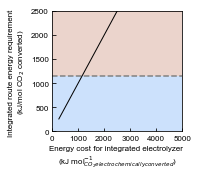

In [11]:
plt.rcParams['font.family']='Arial'
plt.rcParams['font.size']=8

fig=plt.gcf()
fig.set_size_inches((2.33, 2.33*0.95))
xzero=np.arange(0, 12000, 2500)
plt.fill_between(xzero, 0, Qsep, facecolor='#cce1fc')
plt.fill_between(xzero, Qsep, 3500, facecolor='#ebd4cc')

plt.plot(xzero,np.ones(len(xzero))*Qsep, '--', color='gray')

plt.plot(Pcomb, Qcomb, color='k', lw=1)
plt.xlabel('Energy cost for integrated electrolyzer \n(kJ mol$^{-1}_{CO_2 electrochemically converted}$)')
plt.ylabel('Integrated route energy requirement \n(kJ/mol CO$_2$ converted)')
plt.tick_params(direction='in')
plt.xlim(0,5000)
plt.ylim(0, 2500)
#fig.savefig('Figure/Q impact integrated energy.png', bbox_inches='tight', pad_inches=0, dpi=1200)

In [12]:
minid=np.argmin(abs(gain))
print(Pcomb[minid])
print(gain[minid])

1143.42198
0.2113533333331361


# Figure 4

In [13]:
X=np.arange(0.3, 0.51, 0.01)
Ecomb = [4,3,5]
FEcomb = [0.7,0.9,0.4]

#separate

r=np.divide((X-Xout),(Xin-Xout)) #Molar ratio of the unreacted CO2 for the separation&electrolysis process
rc = np.divide((Xin-X),(Xin-Xout)) #Molar ratio of the CO2 used for the integrated electrolysis

Qec = rc*(np.dot(Ecomb[0], z*F)/(FEcomb[0]*1000)) #Energy cost for the integrated electrolyzer
Qarcomb=np.dot(Qsep, r) #Energy cost for the separation & electrolysis process 
Qcomb=Qarcomb + Qec #Total energy cost

Qec_worst = rc*(np.dot(Ecomb[2], z*F)/(FEcomb[2]*1000)) #Energy cost for the integrated electrolyzer
Qcomb_worst = Qarcomb + Qec_worst #Total energy cost

Qec_optimal = rc*(np.dot(Ecomb[1], z*F)/(FEcomb[1]*1000)) #Energy cost for the integrated electrolyzer
Qcomb_optimal = Qarcomb + Qec_optimal #Total energy cost


(500.0, 2000.0)

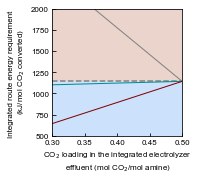

In [14]:
plt.rcParams['font.family']='Arial'
plt.rcParams['font.size']=8

fig=plt.gcf()
fig.set_size_inches((2.33, 2.33))

plt.fill_between(X, 0, Qsep, facecolor='#cce1fc')
plt.fill_between(X, Qsep, 3000, facecolor='#ebd4cc')

plt.plot(X,np.ones(len(X))*Qsep, '--', color='gray')

plt.plot(X, Qcomb, color='darkcyan', lw=1)
plt.plot(X, Qcomb_worst, color='grey', lw=1)
plt.plot(X, Qcomb_optimal, color='maroon', lw=1)

plt.xlabel('CO$_2$ loading in the integrated electrolyzer \n effluent (mol CO$_2$/mol amine)')
plt.ylabel('Integrated route energy requirement \n (kJ/mol CO$_2$ converted)')
plt.tick_params(direction='in')
plt.xlim(0.3,0.5)
plt.ylim(500, 2000)
#plt.yticks(np.arange(1050,1401,50))

#fig.savefig('Figure/X impact integrated energy.png', bbox_inches='tight', pad_inches=0, dpi=1200)

# Fig. S6

Fig. S6c: Energy to regenerate amines

In [15]:
Qar=np.arange(88, 204,1) #kJ/mol 203 Amine-based Post-Combustion CO2 Capture
X=0.3 #fully regenerate the amine solutions
x=0.5 #conversion rate of the electrolyzer

Ecomb = [4,3,5]
FEcomb = [0.7,0.9,0.4]

r=np.divide((X-Xout),(Xin-Xout)) #Molar ratio of the unreacted CO2 for the separation&electrolysis process
rc = np.divide((Xin-X),(Xin-Xout)) #Molar ratio of the CO2 used for the integrated electrolysis

Qec = rc*(np.dot(Ecomb[0], z*F)/(FEcomb[0]*1000))
Qsep=Qar+ Qcompression + Qpsa*2*(1/x-1)+Qcr+E*z*F/FE/1000
Qarcomb=Qsep*r
Qcomb=Qarcomb + Qec

Qec_worst = rc*(np.dot(Ecomb[2], z*F)/(FEcomb[2]*1000))
Qcomb_worst = Qarcomb + Qec_worst

Qec_optimal = rc*(np.dot(Ecomb[1], z*F)/(FEcomb[1]*1000))
Qcomb_optimal = Qarcomb + Qec_optimal



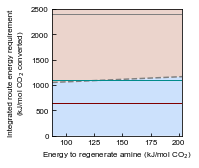

In [16]:
plt.rcParams['font.family']='Arial'
plt.rcParams['font.size']=8

fig=plt.gcf()
fig.set_size_inches((2.33, 2.33))

plt.fill_between(Qar, 0, Qsep, facecolor='#cce1fc')
plt.fill_between(Qar, Qsep, 3000, facecolor='#ebd4cc')

plt.plot(Qar,np.ones(len(Qar))*Qsep, '--', color='gray')

plt.plot(Qar, Qcomb, color='darkcyan', lw=1)
plt.plot(Qar, Qcomb_worst, color='grey', lw=1)
plt.plot(Qar, Qcomb_optimal, color='maroon', lw=1)

plt.xlabel('Energy to regenerate amine (kJ/mol CO$_2$)')
plt.ylabel('Integrated route energy requirement\n(kJ/mol CO$_2$ converted)')
plt.tick_params(direction='in')
plt.xlim(88,203)
plt.ylim(0,2500)
#plt.yticks(np.arange(1000,1251,50))
fig.savefig('Figure/Qar impact integrated.png', bbox_inches='tight', pad_inches=0, dpi=1200)

Fig. S6b: Energy to regenerate bi-carbonates

In [37]:
Qcr=np.dot(254, np.arange(1, 1.6, 0.1)) #kJ/mol
Qar=179 #kJ/mol

Ecomb = [4,3,5]
FEcomb = [0.7,0.9,0.4]

Qec = rc*(np.dot(Ecomb[0], z*F)/(FEcomb[0]*1000))
Qsep=Qar+ Qcompression + Qpsa*2*(1/x-1)+Qcr+E*z*F/FE/1000
Qarcomb=Qsep*r
Qcomb=Qarcomb + Qec

Qec_worst = rc*(np.dot(Ecomb[2], z*F)/(FEcomb[2]*1000))
Qcomb_worst = Qarcomb + Qec_worst

Qec_optimal = rc*(np.dot(Ecomb[1], z*F)/(FEcomb[1]*1000))
Qcomb_optimal = Qarcomb + Qec_optimal


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

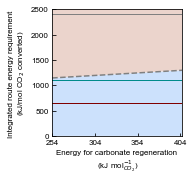

In [40]:
plt.rcParams['font.family']='Arial'
plt.rcParams['font.size']=8

fig=plt.gcf()
fig.set_size_inches((2.33, 2.33))

plt.fill_between(Qcr, 0, Qsep, facecolor='#cce1fc')
plt.fill_between(Qcr, Qsep, 3000, facecolor='#ebd4cc')

plt.plot(Qcr,np.ones(len(Qcr))*Qsep, '--', color='gray')

plt.plot(Qcr, Qcomb, color='darkcyan', lw=1)
plt.plot(Qcr, Qcomb_worst, color='gray', lw=1)
plt.plot(Qcr, Qcomb_optimal, color='maroon', lw=1)

plt.xlabel('Energy for carbonate regeneration \n (kJ mol$^{-1}_{CO_2}$)')
plt.ylabel('Integrated route energy requirement \n(kJ/mol CO$_2$ converted)')
plt.tick_params(direction='in')


plt.xlim(254,406)
plt.ylim(0, 2500)
plt.xticks(np.arange(254, 410, 50))
fig.savefig('Figure/Qcr impact integrated energy.png', bbox_inches='tight', pad_inches=0, dpi=1200)

Fig. S6a: Single pass conversion of the gas-fed electrolyser

In [41]:
Qcr=254 #kJ/mol
Qpsa=(14.5 + 36.4)/2 # Pressure swing absorption kJ/molCO2, the energy is in between 14.5-36.4 kJ/molCO2.
x=np.arange(0.1,0.91, 0.01) #Single-pass conversion
Ecomb = [4,3,5]
FEcomb = [0.7,0.9,0.4]

#Energy calculation
Qsep=Qar+ Qcompression + Qcr+Qpsa*2*(1/x-1)+E*z*F/FE/1000
Qarcomb=Qsep*r
Qcomb=Qarcomb + rc*Ecomb[0]*z*F/FEcomb[0]/1000
Qcomb_worst = Qarcomb + rc*Ecomb[2]*z*F/FEcomb[2]/1000
Qcomb_optimal = Qarcomb + rc*Ecomb[1]*z*F/FEcomb[1]/1000

gain = Qsep - Qcomb

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.8399999999999996
-0.2571428571427532


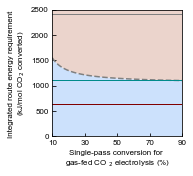

In [43]:
plt.rcParams['font.family']='Arial'
plt.rcParams['font.size']=8

fig=plt.gcf()
fig.set_size_inches((2.33, 2.33))

plt.fill_between(x*100, 0, Qsep, facecolor='#cce1fc')
plt.fill_between(x*100, Qsep, 3000, facecolor='#ebd4cc')

plt.plot(x*100,np.ones(len(x))*Qsep, '--', color='gray')

plt.plot(x*100, Qcomb, color='darkcyan', lw=1)
plt.plot(x*100, Qcomb_worst, color='gray', lw=1)
plt.plot(x*100, Qcomb_optimal, color='maroon', lw=1)

plt.xlabel('Single-pass conversion for \ngas-fed CO $_2$ electrolysis (%)')
plt.ylabel('Integrated route energy requirement \n(kJ/mol CO$_2$ converted)')
plt.tick_params(direction='in')


plt.xlim(10,90)
plt.ylim(0, 2500)
plt.xticks(np.arange(10, 91, 20))

minid=np.argmin(abs(gain))
print(x[minid])
print(gain[minid])

fig.savefig('Figure/single pass conversion on impact integrated energy-1.png', bbox_inches='tight', pad_inches=0, dpi=1200)

Fig. S6d: PSA product separation energy cost effects

In [44]:
Qpsa=np.arange(14.5, 36.5, 0.1) # Pressure swing absorption kJ/molCO2, the energy is in between 14.5-36.4 kJ/molCO2.
x=0.5
FE=0.9  #assuming normal electrolysis FE CO remain 90% up to 100 mA cm-2
E=3 #V, overall cell voltage, cathode potential is -0.6 vs RHE

#Calculate energy cost
Qsep=Qar+Qcompression + Qcr+Qpsa*2*(1/x-1)+E*z*F/FE/1000 #Sequential route
    
Qarcomb=Qsep*r
Qcomb=Qarcomb + rc*Ecomb[0]*z*F/FEcomb[0]/1000
Qcomb_worst = Qarcomb + rc*Ecomb[2]*z*F/FEcomb[2]/1000
Qcomb_optimal = Qarcomb + rc*Ecomb[1]*z*F/FEcomb[1]/1000

#gain
gain=Qsep-Qcomb

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

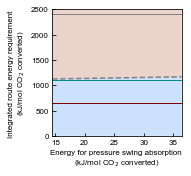

In [45]:
plt.rcParams['font.family']='Arial'
plt.rcParams['font.size']=8

fig=plt.gcf()
fig.set_size_inches((2.33, 2.33))

##cce1fc, 
plt.fill_between(Qpsa, 0, Qsep, facecolor='#cce1fc')
plt.fill_between(Qpsa, Qsep, 3000, facecolor='#ebd4cc')

plt.plot(Qpsa,np.ones(len(Qpsa))*Qsep, '--', color='gray')

plt.plot(Qpsa, Qcomb, color='darkcyan', lw=1)
plt.plot(Qpsa, Qcomb_worst, color='gray', lw=1)
plt.plot(Qpsa, Qcomb_optimal, color='maroon', lw=1)

plt.xlabel('Energy for pressure swing absorption \n(kJ/mol CO$_2$ converted)')
plt.ylabel('Integrated route energy requirement \n(kJ/mol CO$_2$ converted)')
plt.tick_params(direction='in')


plt.xlim(14.5,36.5)
plt.ylim(0, 2500)

fig.savefig('Figure/PSA separation integrated energy-1.png', bbox_inches='tight', pad_inches=0, dpi=1200)